# Binary Classification with a Bank Churn Dataset3
(CatBoostClassifierの実践)
## 1. ライブラリ

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from catboost import CatBoostClassifier

## 2. データ整理
### 2.1. データ取入れ

In [2]:
# Binary Classification with a Bank Churn Dataset のデータセット
dir_path = '/kaggle/input/playground-series-s4e1/'
test = pd.read_csv(dir_path + 'test.csv')       # テストデータ
train = pd.read_csv(dir_path + 'train.csv')     # 訓練データ
samp_sub = pd.read_csv(dir_path + 'sample_submission.csv')

### 2.2. データ変型

In [3]:
for data in [train, test]:
    data.HasCrCard = data.HasCrCard.astype('int')
    data.IsActiveMember = data.IsActiveMember.astype('int')
    data.CreditScore = data.CreditScore / 1000
    data.Age = data.Age / 100
    data.Balance = data.Balance / 250000

In [4]:
X_features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
              'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
X_tra, X_val, y_tra, y_val = train_test_split(train[X_features], train.Exited, test_size=0.2, random_state=0)
X_train = train[X_features]
y_train = train.Exited
X_test = test[X_features]
cat_features = [1, 2, 4, 6, 7, 8]

## 3. CatBoostClassifierの実践
### 3.1. iteration

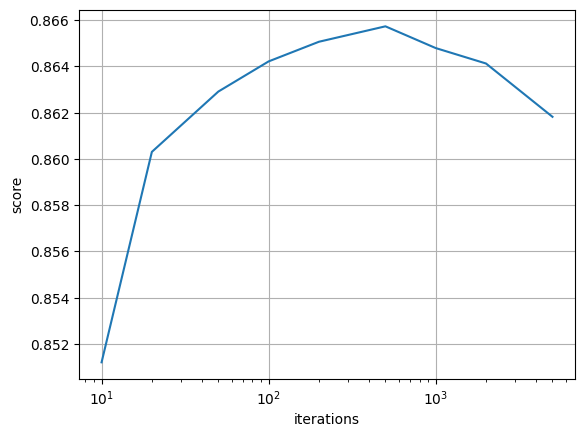

In [5]:
iterations = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000]
scores = []
for i in iterations:
    cbc = CatBoostClassifier(
        iterations=i,
        learning_rate=0.1 
    )

    cbc.fit(X_tra, y_tra,
        cat_features=cat_features, 
        verbose=False
    )

    scores.append(cbc.score(X_val, y_val))

fig = plt.figure()
plt.plot(iterations, scores)
plt.xlabel('iterations')
plt.ylabel('score')
plt.xscale('log')
plt.grid()
plt.show()

### 3.2. learning_rate

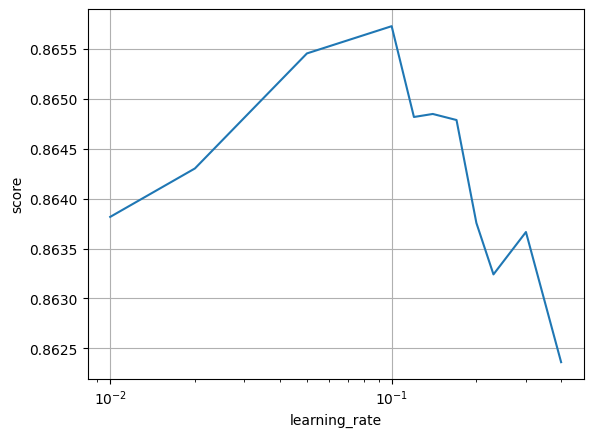

In [6]:
learning_rate = [0.01, 0.02, 0.05, 0.1, 0.12, 0.14, 0.17, 0.2, 0.23, 0.3, 0.4]
scores = []
for l in learning_rate:
    cbc = CatBoostClassifier(
        iterations=500,
        learning_rate=l
    )

    cbc.fit(X_tra, y_tra,
        cat_features=cat_features, 
        verbose=False
    )

    scores.append(cbc.score(X_val, y_val))

fig = plt.figure()
plt.plot(learning_rate, scores)
plt.xlabel('learning_rate')
plt.ylabel('score')
plt.xscale('log')
plt.grid()
plt.show()

### 3.3. bootstrap_type

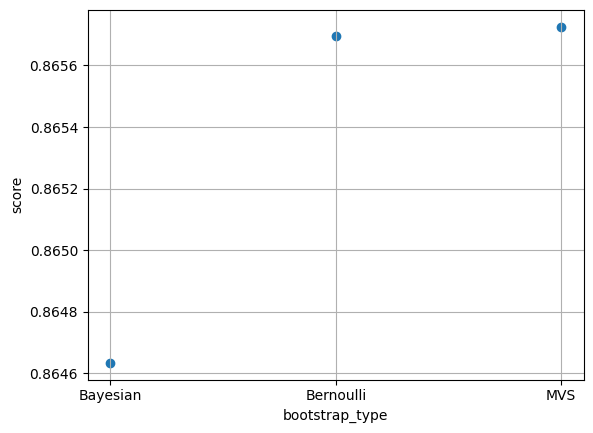

In [7]:
bootstrap_type = ['Bayesian', 'Bernoulli', 'MVS']
scores = []
for b in bootstrap_type:
    cbc = CatBoostClassifier(
        iterations=500,
        learning_rate=0.1,
        bootstrap_type=b
    )

    cbc.fit(X_tra, y_tra,
        cat_features=cat_features, 
        verbose=False
    )

    scores.append(cbc.score(X_val, y_val))

fig = plt.figure()
plt.scatter(bootstrap_type, scores)
plt.xlabel('bootstrap_type')
plt.ylabel('score')
plt.grid()
plt.show()

### 3.4. depth

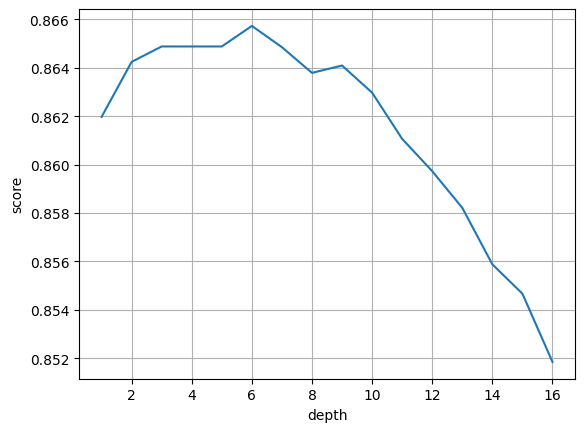

In [8]:
depth = [i for i in range(1, 17)]
scores = []
for d in depth:
    cbc = CatBoostClassifier(
        iterations=500,
        learning_rate=0.1,
        bootstrap_type='MVS',
        depth=d
    )

    cbc.fit(X_tra, y_tra,
        cat_features=cat_features, 
        verbose=False
    )

    scores.append(cbc.score(X_val, y_val))

fig = plt.figure()
plt.plot(depth, scores)
plt.xlabel('depth')
plt.ylabel('score')
plt.grid()
plt.show()

### 3.5. grow_policy

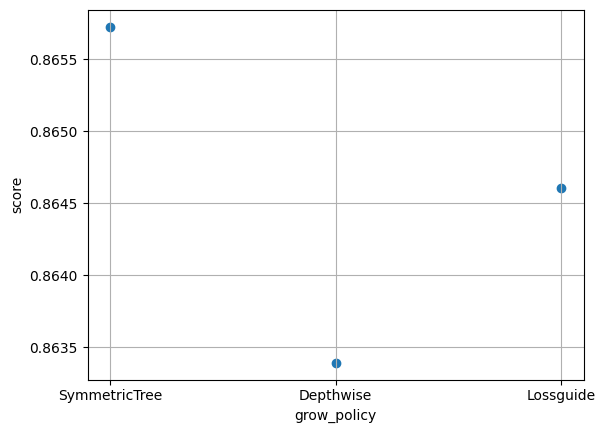

In [9]:
grow_policy = ['SymmetricTree', 'Depthwise', 'Lossguide']
scores = []
for g in grow_policy:
    cbc = CatBoostClassifier(
        iterations=500,
        learning_rate=0.1,
        bootstrap_type='MVS',
        depth=6,
        grow_policy=g
    )

    cbc.fit(X_tra, y_tra,
        cat_features=cat_features, 
        verbose=False
    )

    scores.append(cbc.score(X_val, y_val))

fig = plt.figure()
plt.scatter(grow_policy, scores)
plt.xlabel('grow_policy')
plt.ylabel('score')
plt.grid()
plt.show()

### 3.6. penalties_coefficient

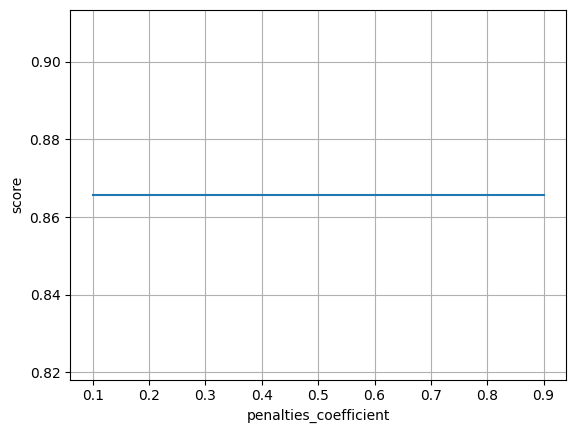

In [10]:
penalties_coefficient = [0.1, 0.3, 0.5, 0.7, 0.9]
scores = []
for p in penalties_coefficient:
    cbc = CatBoostClassifier(
        iterations=500,
        learning_rate=0.1,
        bootstrap_type='MVS',
        depth=6,
        grow_policy='SymmetricTree',
        penalties_coefficient=p
    )

    cbc.fit(X_tra, y_tra,
        cat_features=cat_features, 
        verbose=False
    )

    scores.append(cbc.score(X_val, y_val))

fig = plt.figure()
plt.plot(penalties_coefficient, scores)
plt.xlabel('penalties_coefficient')
plt.ylabel('score')
plt.grid()
plt.show()

### 3.7. model_shrink_rate & model_shrink_mode

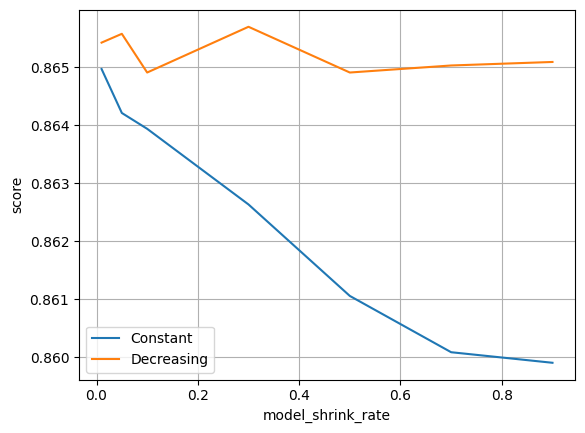

In [11]:
model_shrink_rate = [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9]
model_shrink_mode = ['Constant', 'Decreasing']
scores = []
for m in model_shrink_mode:
    scores.append([])
    for r in model_shrink_rate:
        cbc = CatBoostClassifier(
            iterations=500,
            learning_rate=0.1,
            bootstrap_type='MVS',
            depth=6,
            grow_policy='SymmetricTree',
            model_shrink_mode=m,
            model_shrink_rate=r
        )

        cbc.fit(X_tra, y_tra,
            cat_features=cat_features, 
            verbose=False
        )

        scores[-1].append(cbc.score(X_val, y_val))

fig = plt.figure()
plt.plot(model_shrink_rate, scores[0], label='Constant')
plt.plot(model_shrink_rate, scores[1], label='Decreasing')
plt.xlabel('model_shrink_rate')
plt.ylabel('score')
plt.legend()
plt.grid()
plt.show()

## 4. testデータの予測

In [12]:
cbc = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    bootstrap_type='MVS',
    depth=6,
    grow_policy='SymmetricTree',
    model_shrink_mode='Decreasing',
    model_shrink_rate=0.3
)

cbc.fit(X_train, y_train,
    cat_features=cat_features, 
    verbose=False
)

prediction = cbc.predict(X_test)
output = pd.DataFrame({'id':test.id, 'Exited':prediction})
output.to_csv('submission.csv', index=False)